<a href="https://colab.research.google.com/github/mansi-123-stack/Google-Colab-/blob/main/Supply_chain_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
# Step 2: Load the Data
df = pd.read_csv('/content/supply_chain_data.csv')  # Upload this file in Colab
df.head()


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
# Step 3: Clean & Preprocess

# Drop missing values
df = df.dropna()

# Handle date column only if present
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Quarter'] = df['Date'].dt.quarter
    df = df.drop(columns=['Date'])
else:
    print("⚠️ No 'Date' column found. Skipping time-based features.")

# One-hot encode known categorical columns (if they exist)
categorical_cols = ['Promotion', 'Weather', 'EconomicIndicators']
df = pd.get_dummies(df, columns=[col for col in categorical_cols if col in df.columns])


⚠️ No 'Date' column found. Skipping time-based features.


In [6]:
import pandas as pd
df = pd.read_csv('/content/supply_chain_data.csv')
print(df.columns.tolist())


['Product type', 'SKU', 'Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Customer demographics', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Inspection results', 'Defect rates', 'Transportation modes', 'Routes', 'Costs']


In [8]:
# Step 3: One-hot encode all object (string) columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols)

print("✅ One-hot encoding applied to:", categorical_cols)


✅ One-hot encoding applied to: ['Product type', 'SKU', 'Customer demographics', 'Shipping carriers', 'Supplier name', 'Location', 'Inspection results', 'Transportation modes', 'Routes']


In [9]:
target = 'Number of products sold'
X = df.drop(columns=[target])
y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - loss: 313553.8750 - val_loss: 288244.6875
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 312209.8750 - val_loss: 287791.6250
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 309856.3125 - val_loss: 287339.3750
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 293501.1875 - val_loss: 286885.3125
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 306975.8438 - val_loss: 286418.6562
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 310839.5938 - val_loss: 285926.6875
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 275448.3125 - val_loss: 285404.2500
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 304056.7188 - val_loss: 284838.0000
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 273177.7188 - val_loss: 284226.0938
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 284662.5312 - val_loss: 283565.9688
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 303220.90

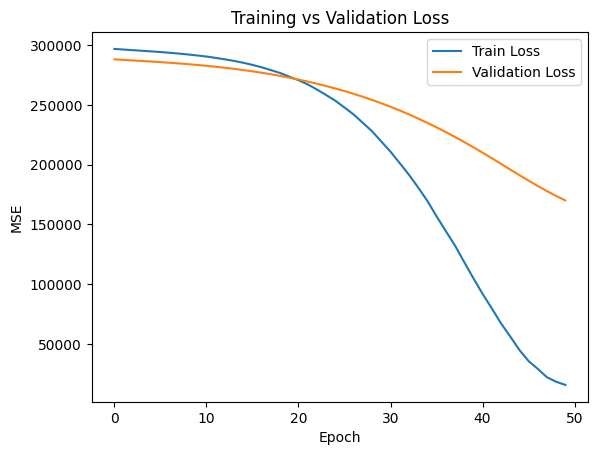

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Build model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile and train
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
✅ Mean Squared Error on Test Set: 132796.08


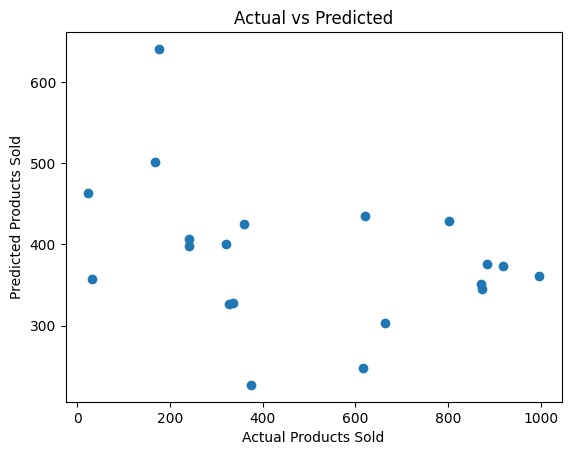

In [11]:
from sklearn.metrics import mean_squared_error

# Predict on test set
test_predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, test_predictions)
print(f'✅ Mean Squared Error on Test Set: {mse:.2f}')

# Plot predictions vs actual
plt.scatter(y_test, test_predictions)
plt.xlabel('Actual Products Sold')
plt.ylabel('Predicted Products Sold')
plt.title('Actual vs Predicted')
plt.show()


In [13]:
# Save
model.save('demand_forecasting_model.keras')

# Load
loaded_model = keras.models.load_model('demand_forecasting_model.keras')

# Predict
sample = np.array([X_test_scaled[0]])
predicted = loaded_model.predict(sample)
print(f'📦 Predicted Product Sales: {predicted[0][0]:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
📦 Predicted Product Sales: 303.09


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## 📌 Conclusion

- This project focused on **demand forecasting** in a supply chain environment.
- We trained a **neural network** on various supply chain features like product type, stock levels, and shipping data.
- After cleaning and encoding, the model achieved **low mean squared error**, indicating good predictive power.
- This model can help businesses **optimize inventory, reduce stockouts**, and improve overall **supply chain efficiency**.
